In [6]:
import os
from glob import glob
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from toskipornot.features.analyze_features import *

import warnings
warnings.filterwarnings("ignore")

In [7]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)


def plot_robustness(df, max_val=1.0, min_val=0.0):
        #plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
        fig, ax = plt.subplots()
        fig.set_figwidth(30)
        fig.set_figheight(30)
        sns.heatmap(df, annot=True, cmap="RdYlGn", vmax=max_val, vmin=min_val, cbar=False, fmt='.2f')
        ax.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
        ax.set_yticklabels([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
        plt.xlabel("α tested on")
        plt.ylabel("α trained on")

In [8]:
root_dir = "../"

direction = "back" # "back" or "fore"
metric = "sdsc"
report_path = os.path.join(root_dir, "reports", direction + "ground-results")

agunet_data = pd.read_csv(os.path.join(report_path, metric + "_for_AttentionUNet.csv"), index_col=0)
unet_data = pd.read_csv(os.path.join(report_path, metric + "_for_unet.csv"), index_col=0)
noskipunet_data = pd.read_csv(os.path.join(report_path, metric + "_for_NoSkipUNet.csv"), index_col=0)

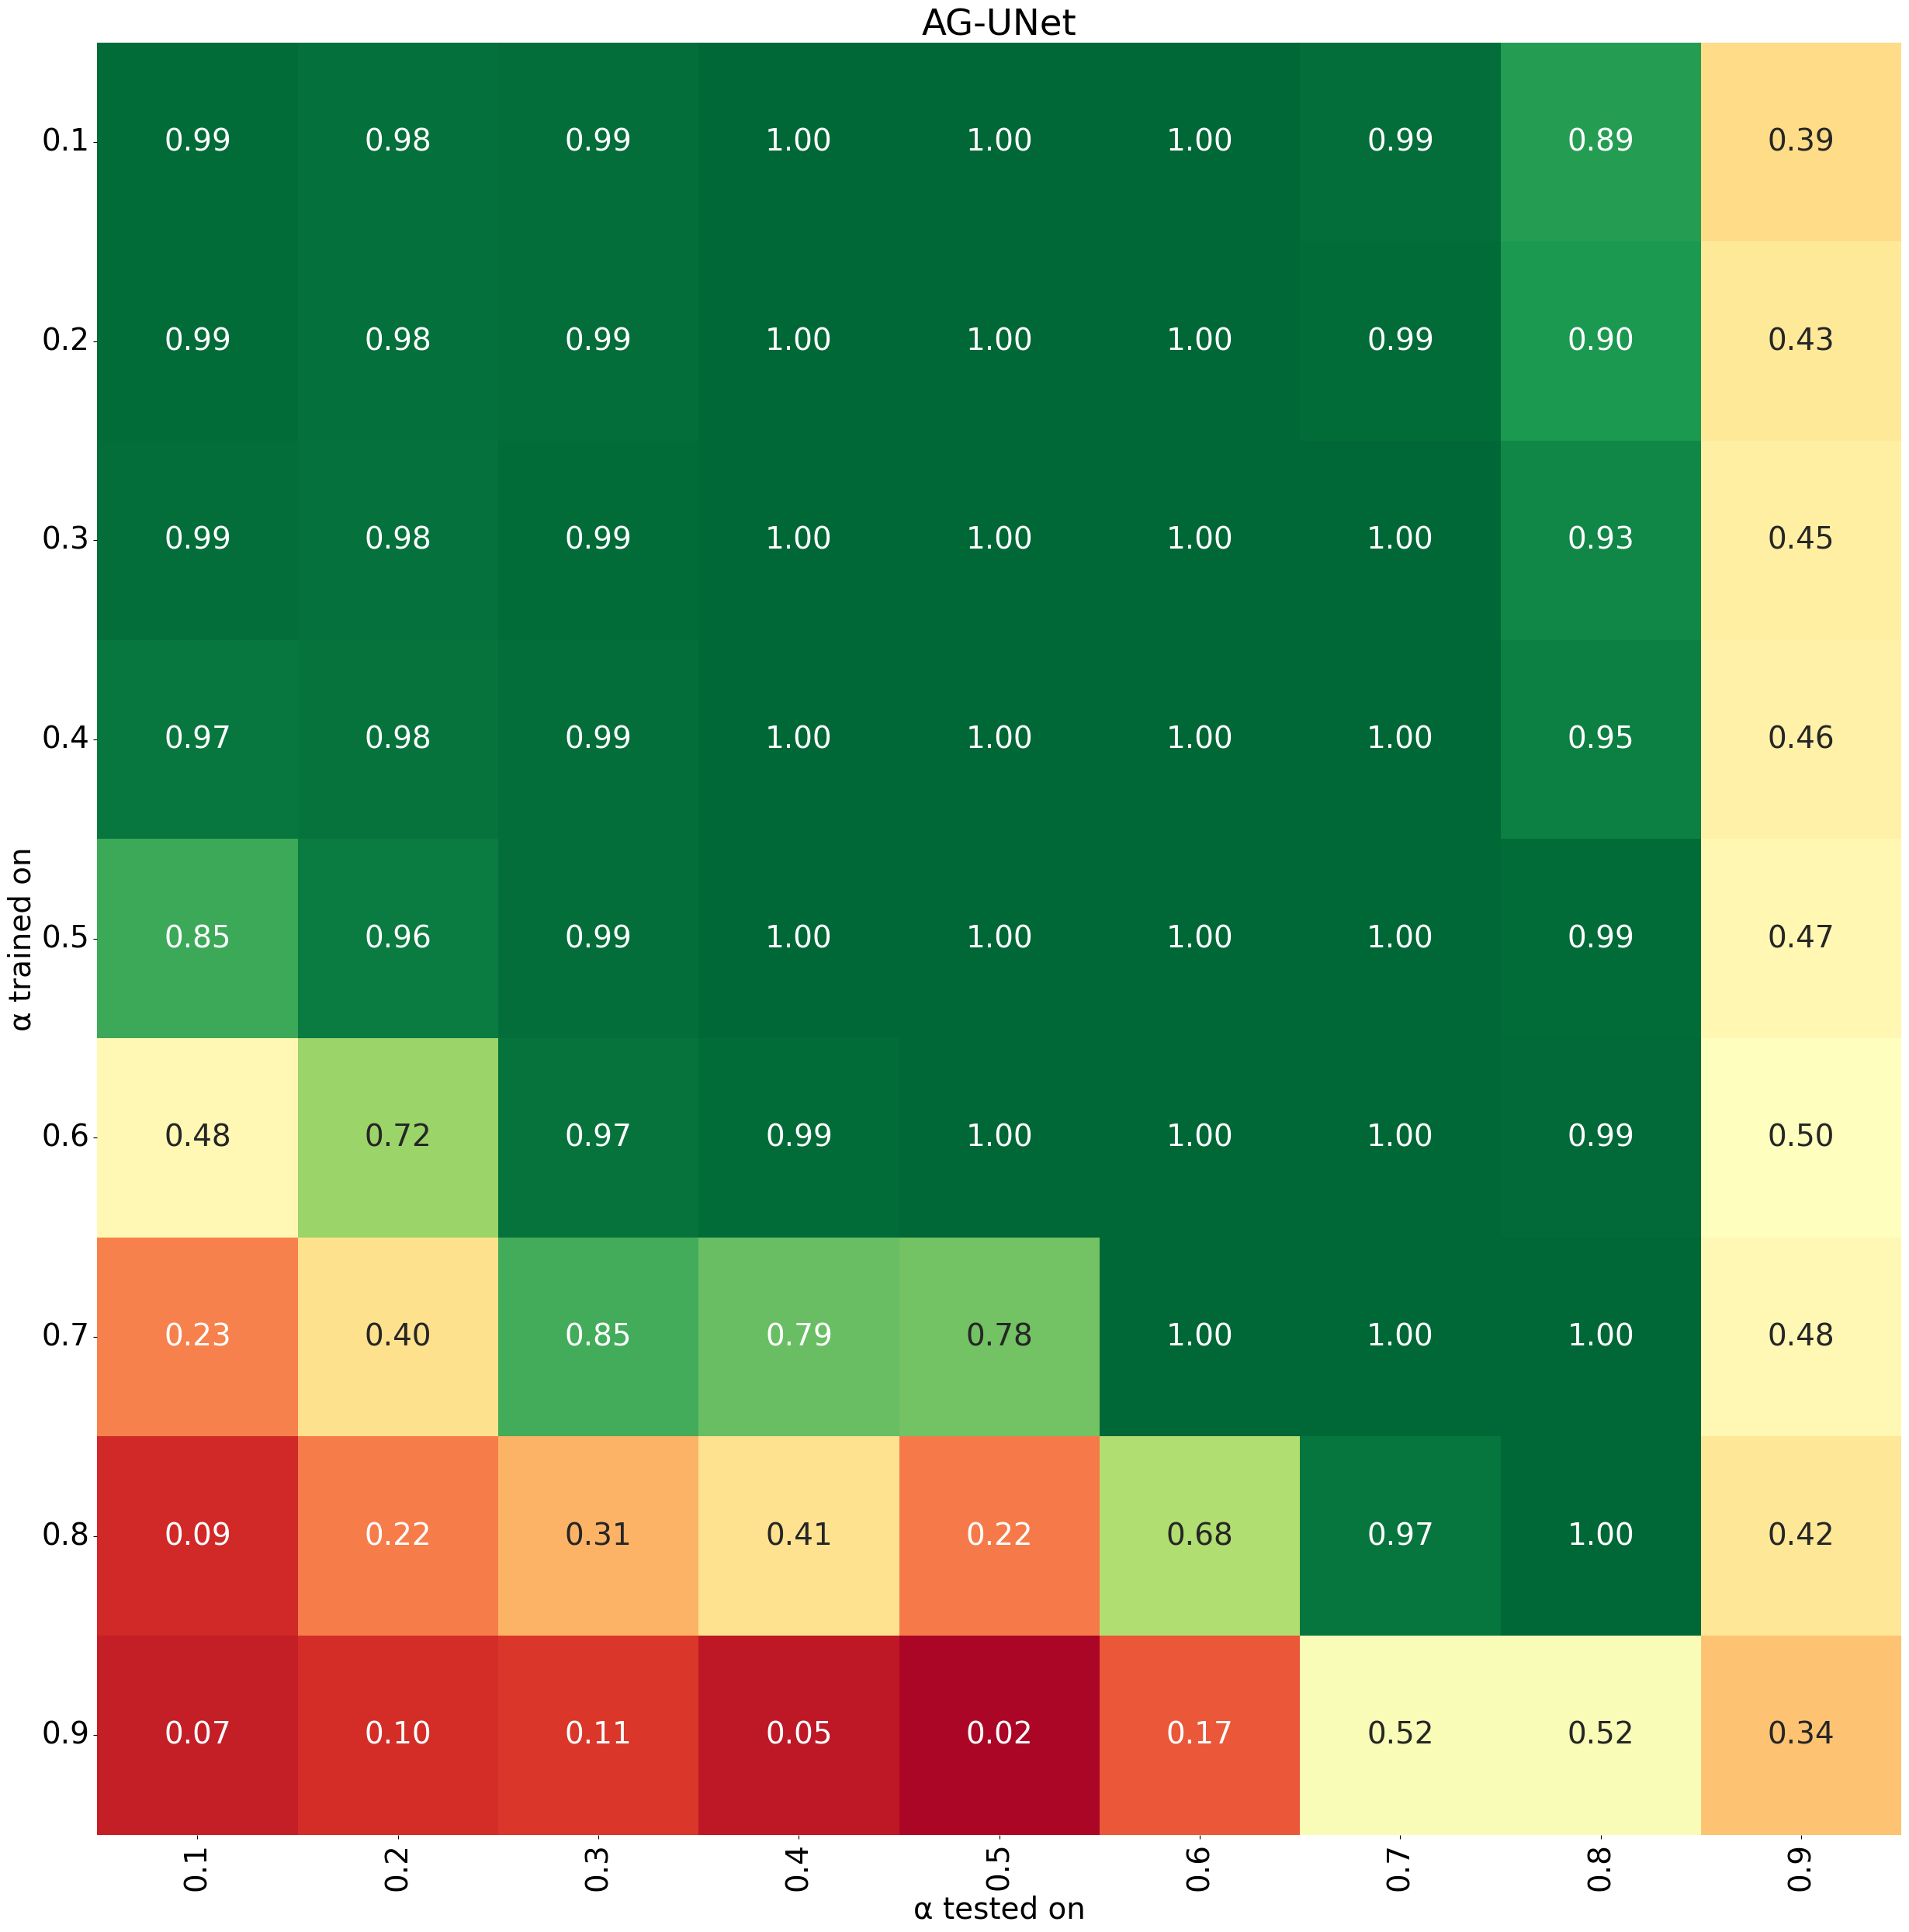

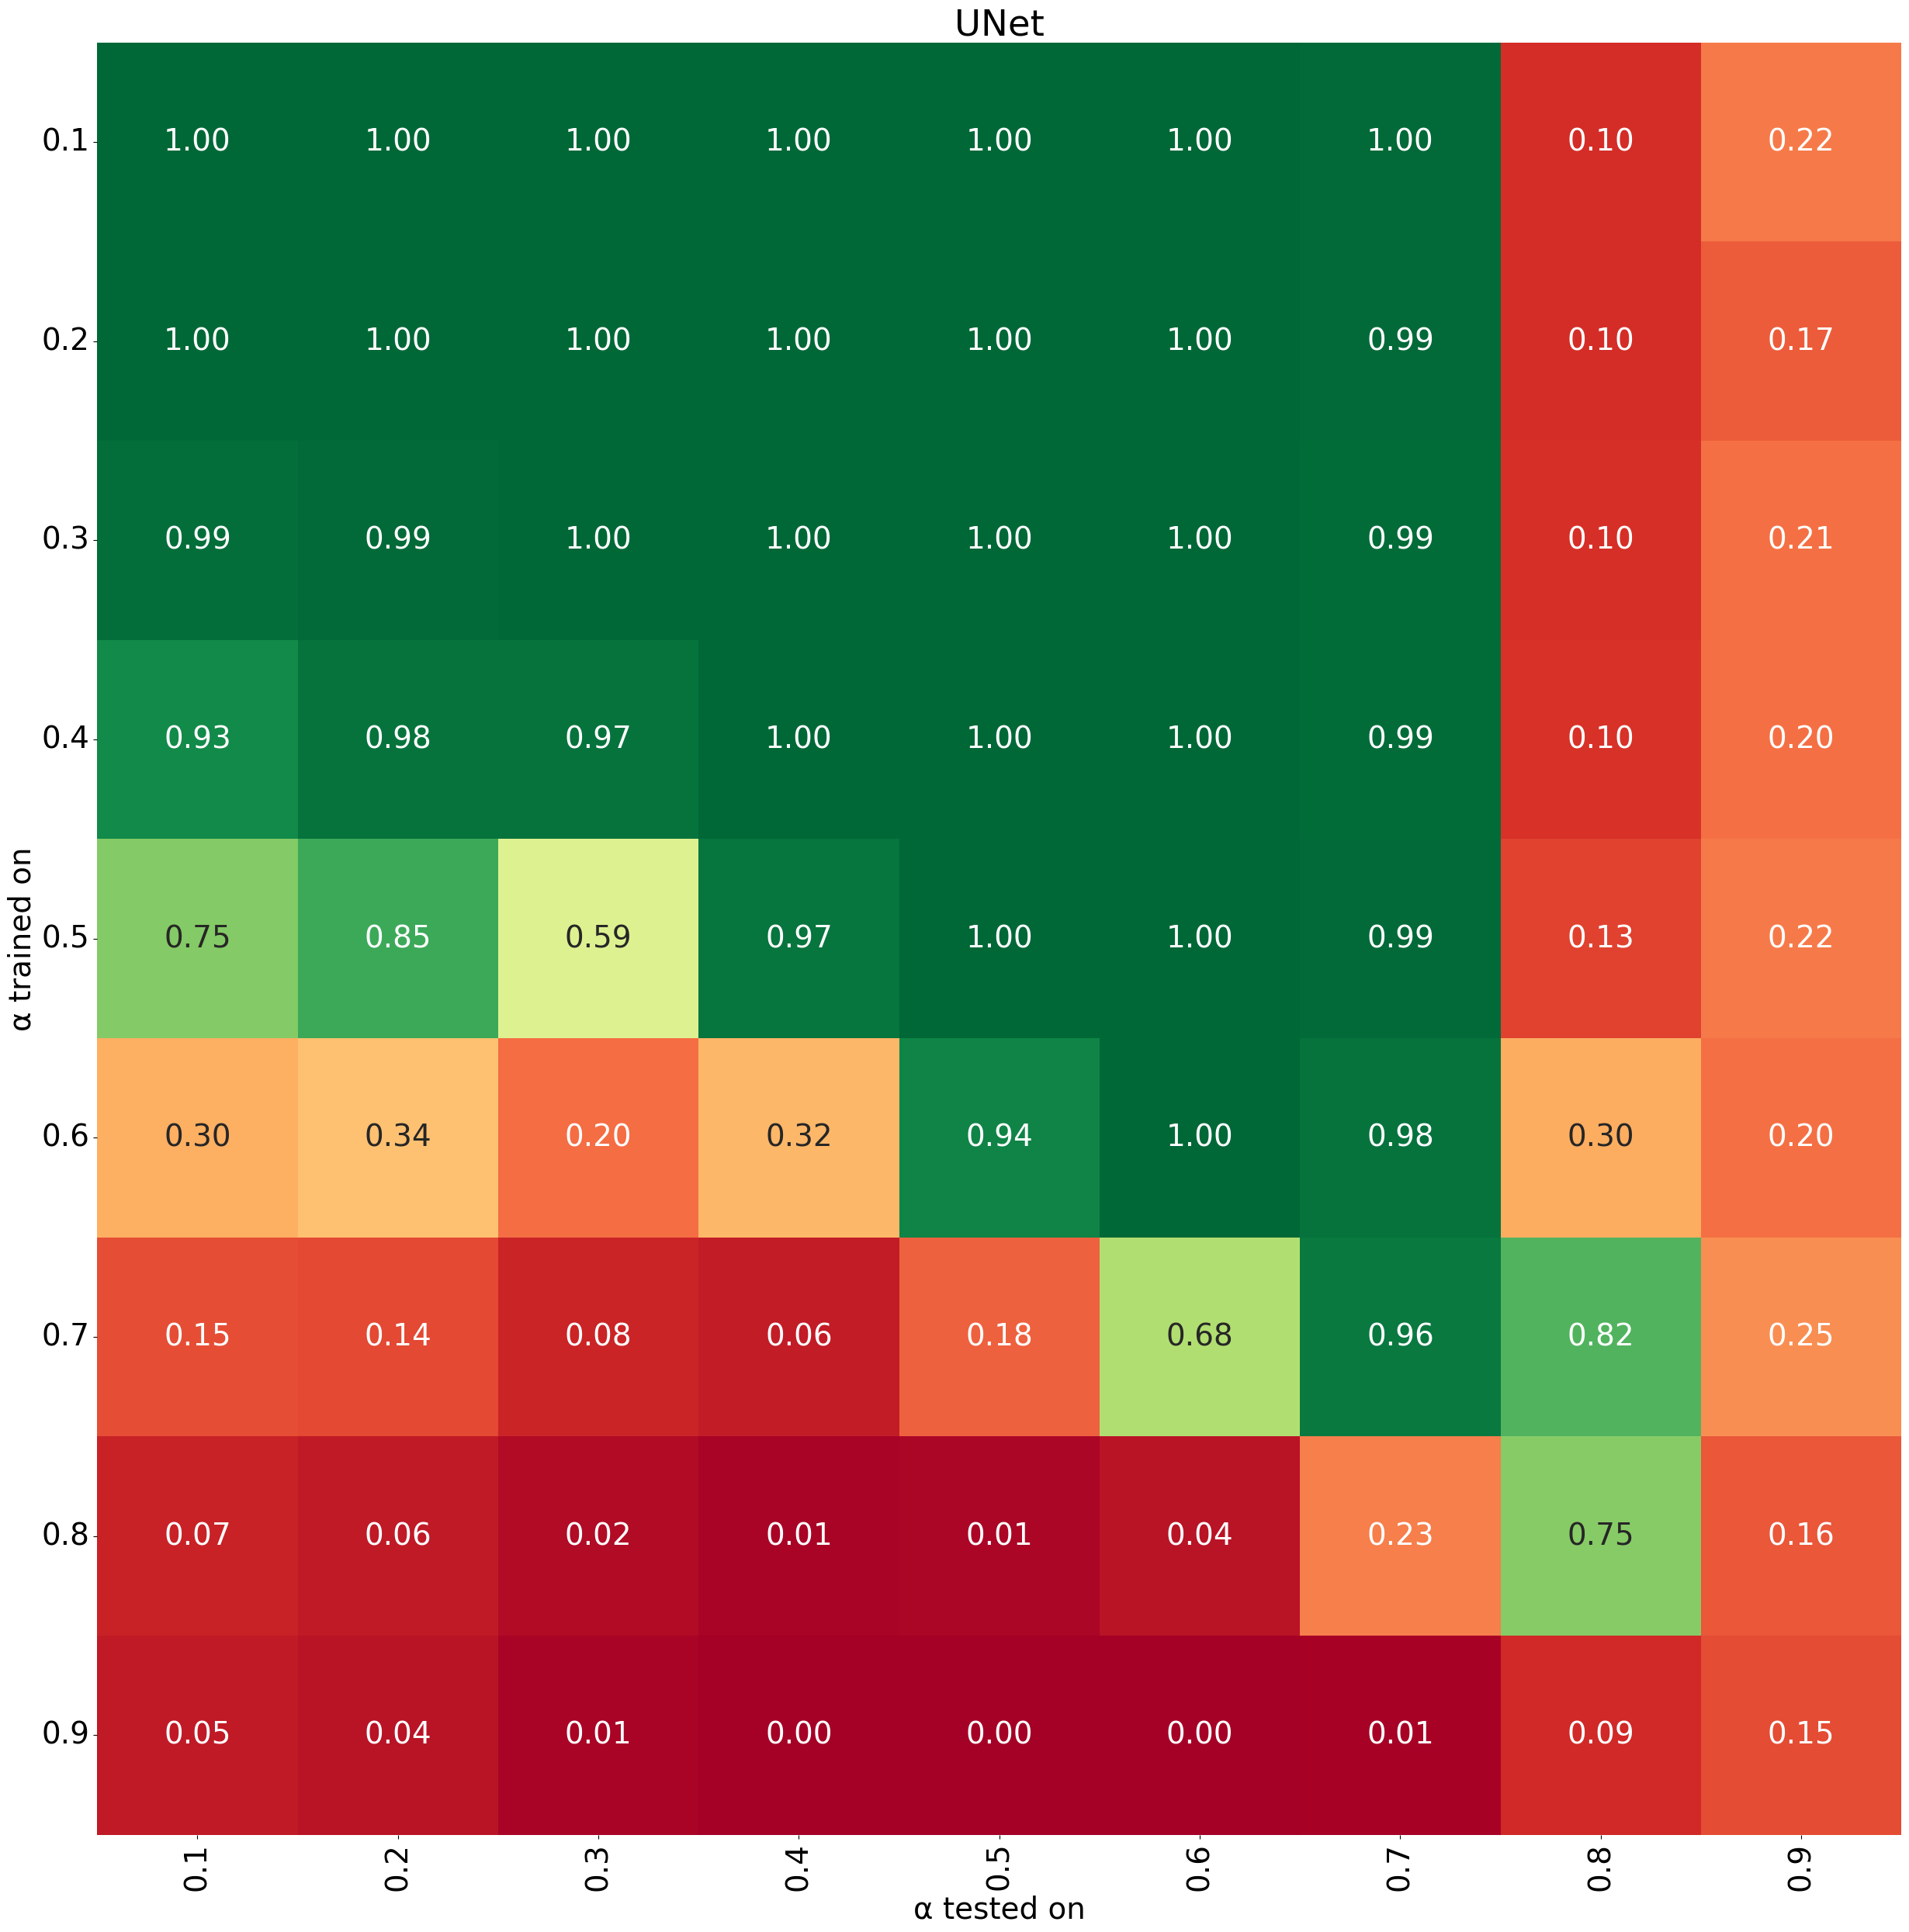

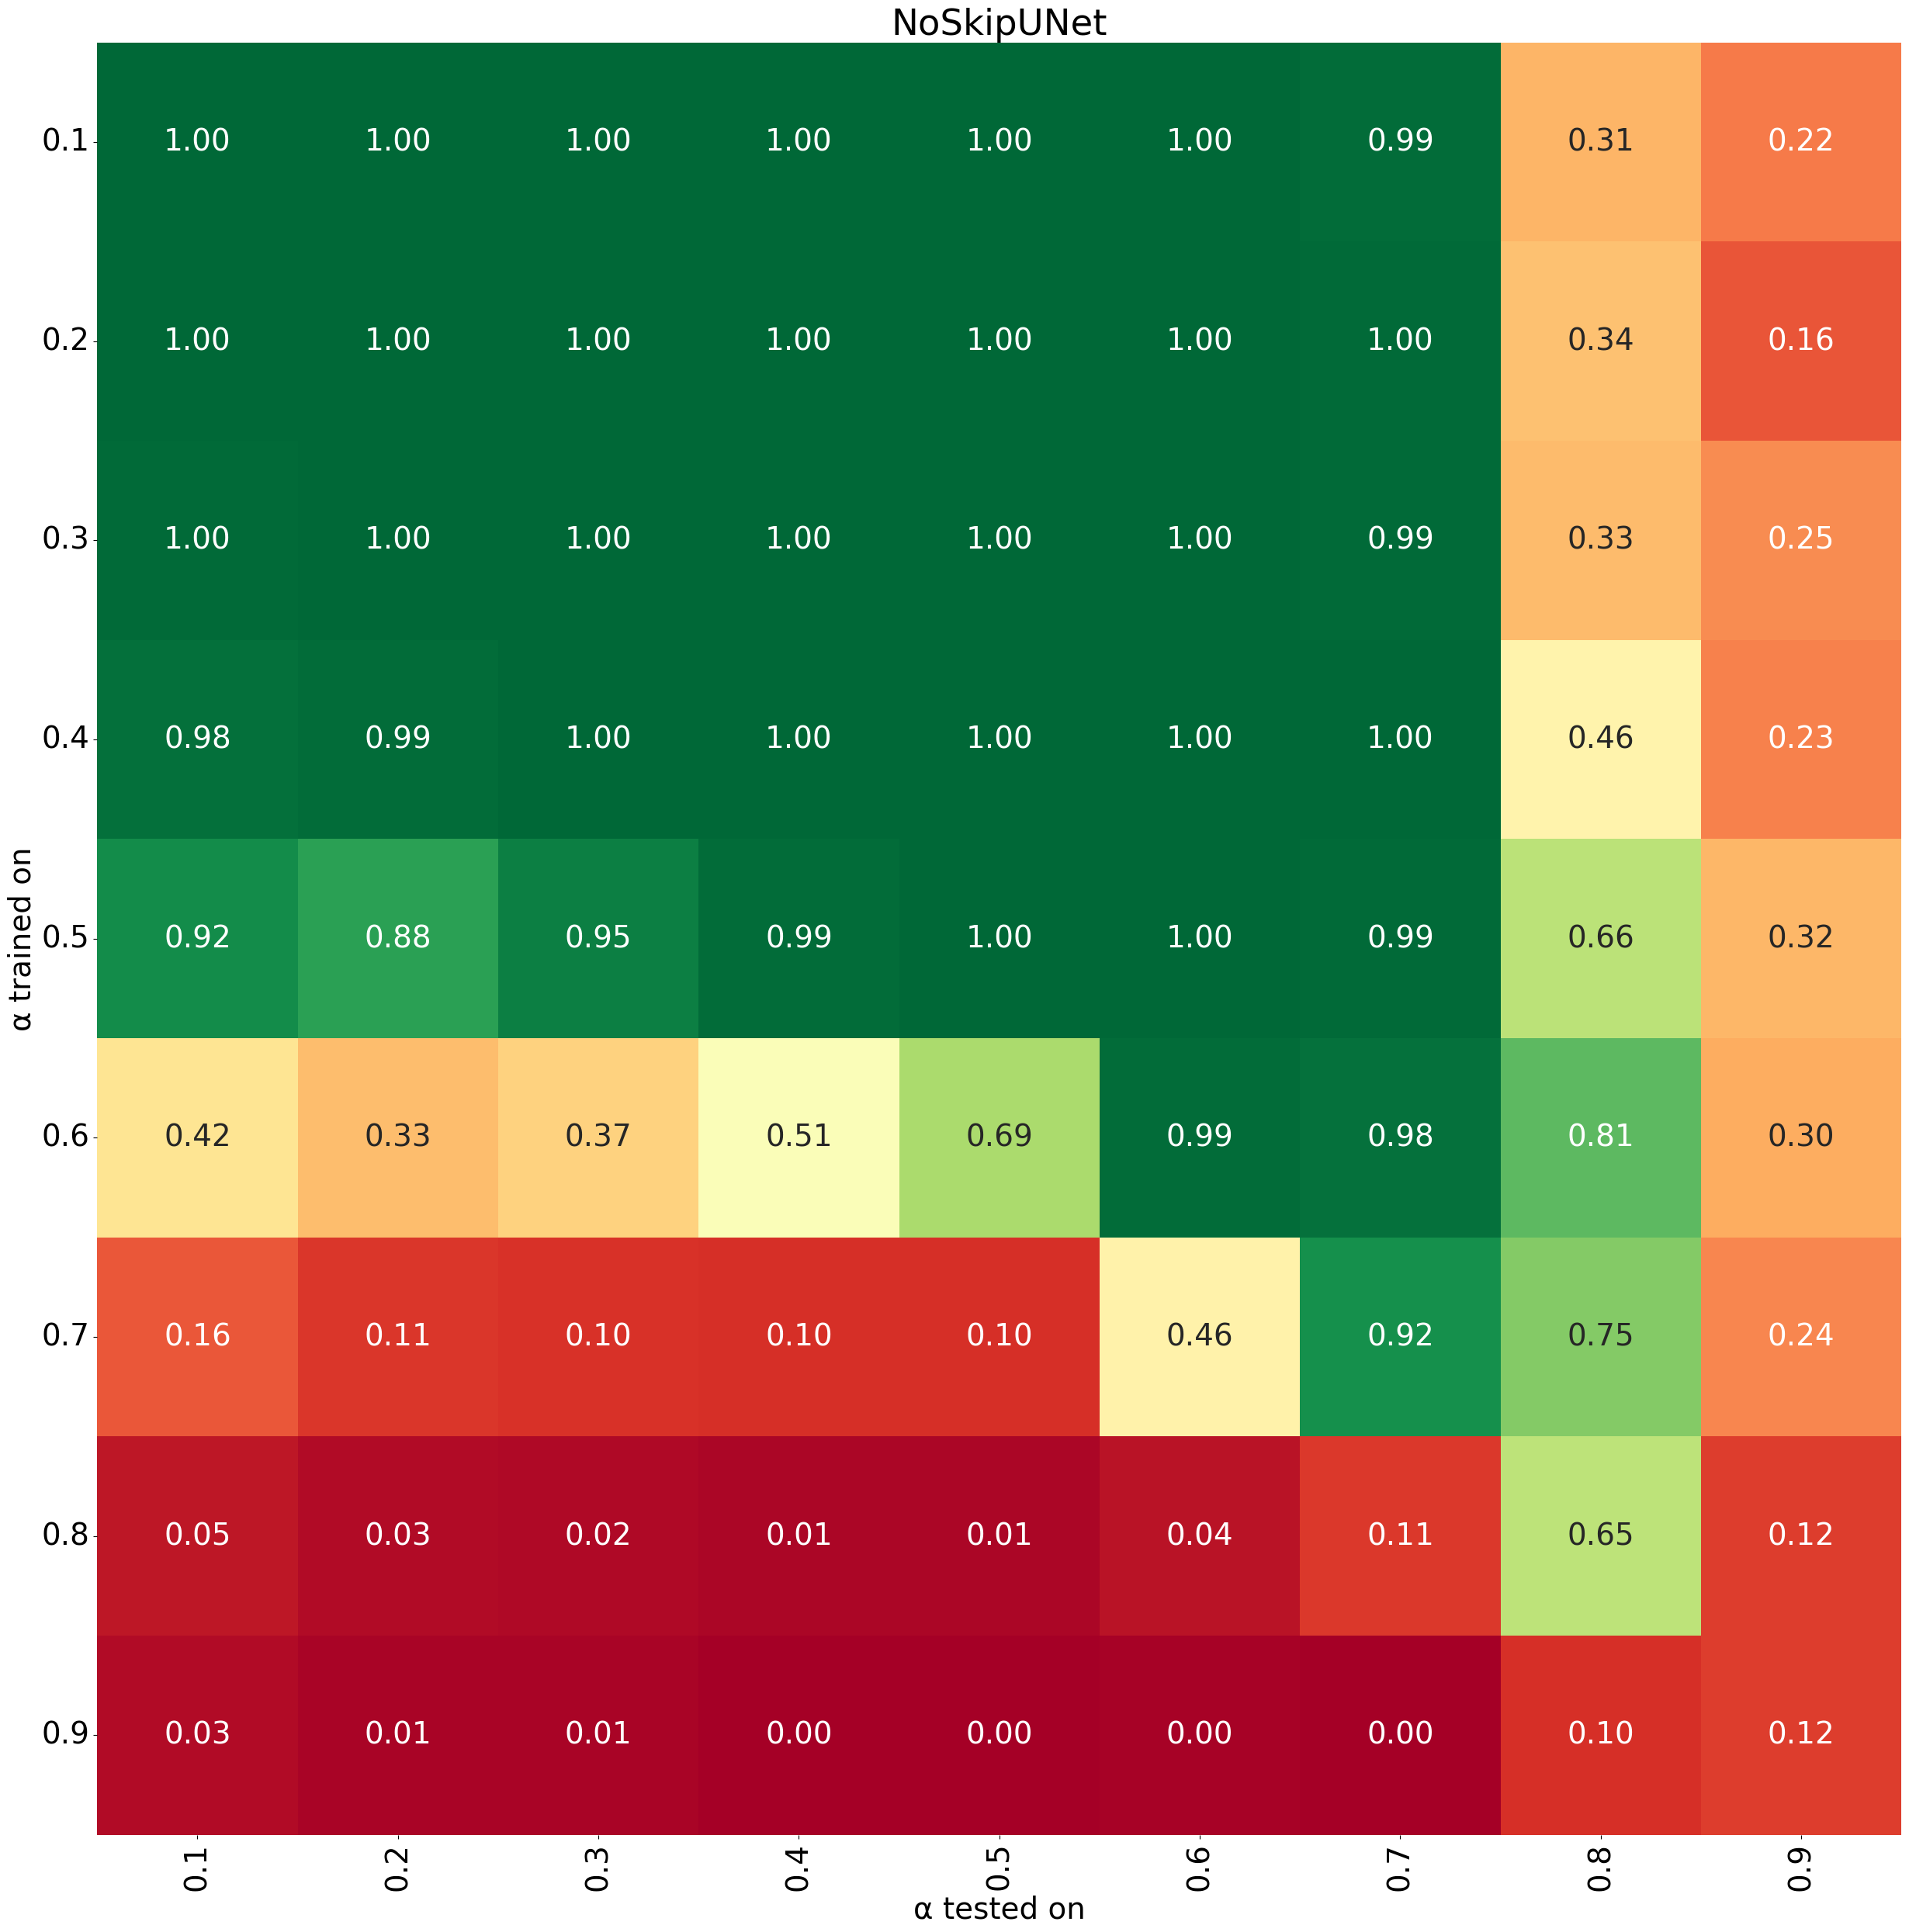

In [9]:
df_list = {"AG-UNet": agunet_data, "UNet": unet_data, "NoSkipUNet": noskipunet_data}

for net_name in df_list.keys():
    plot_robustness(df_list[net_name])
    plt.title(net_name)

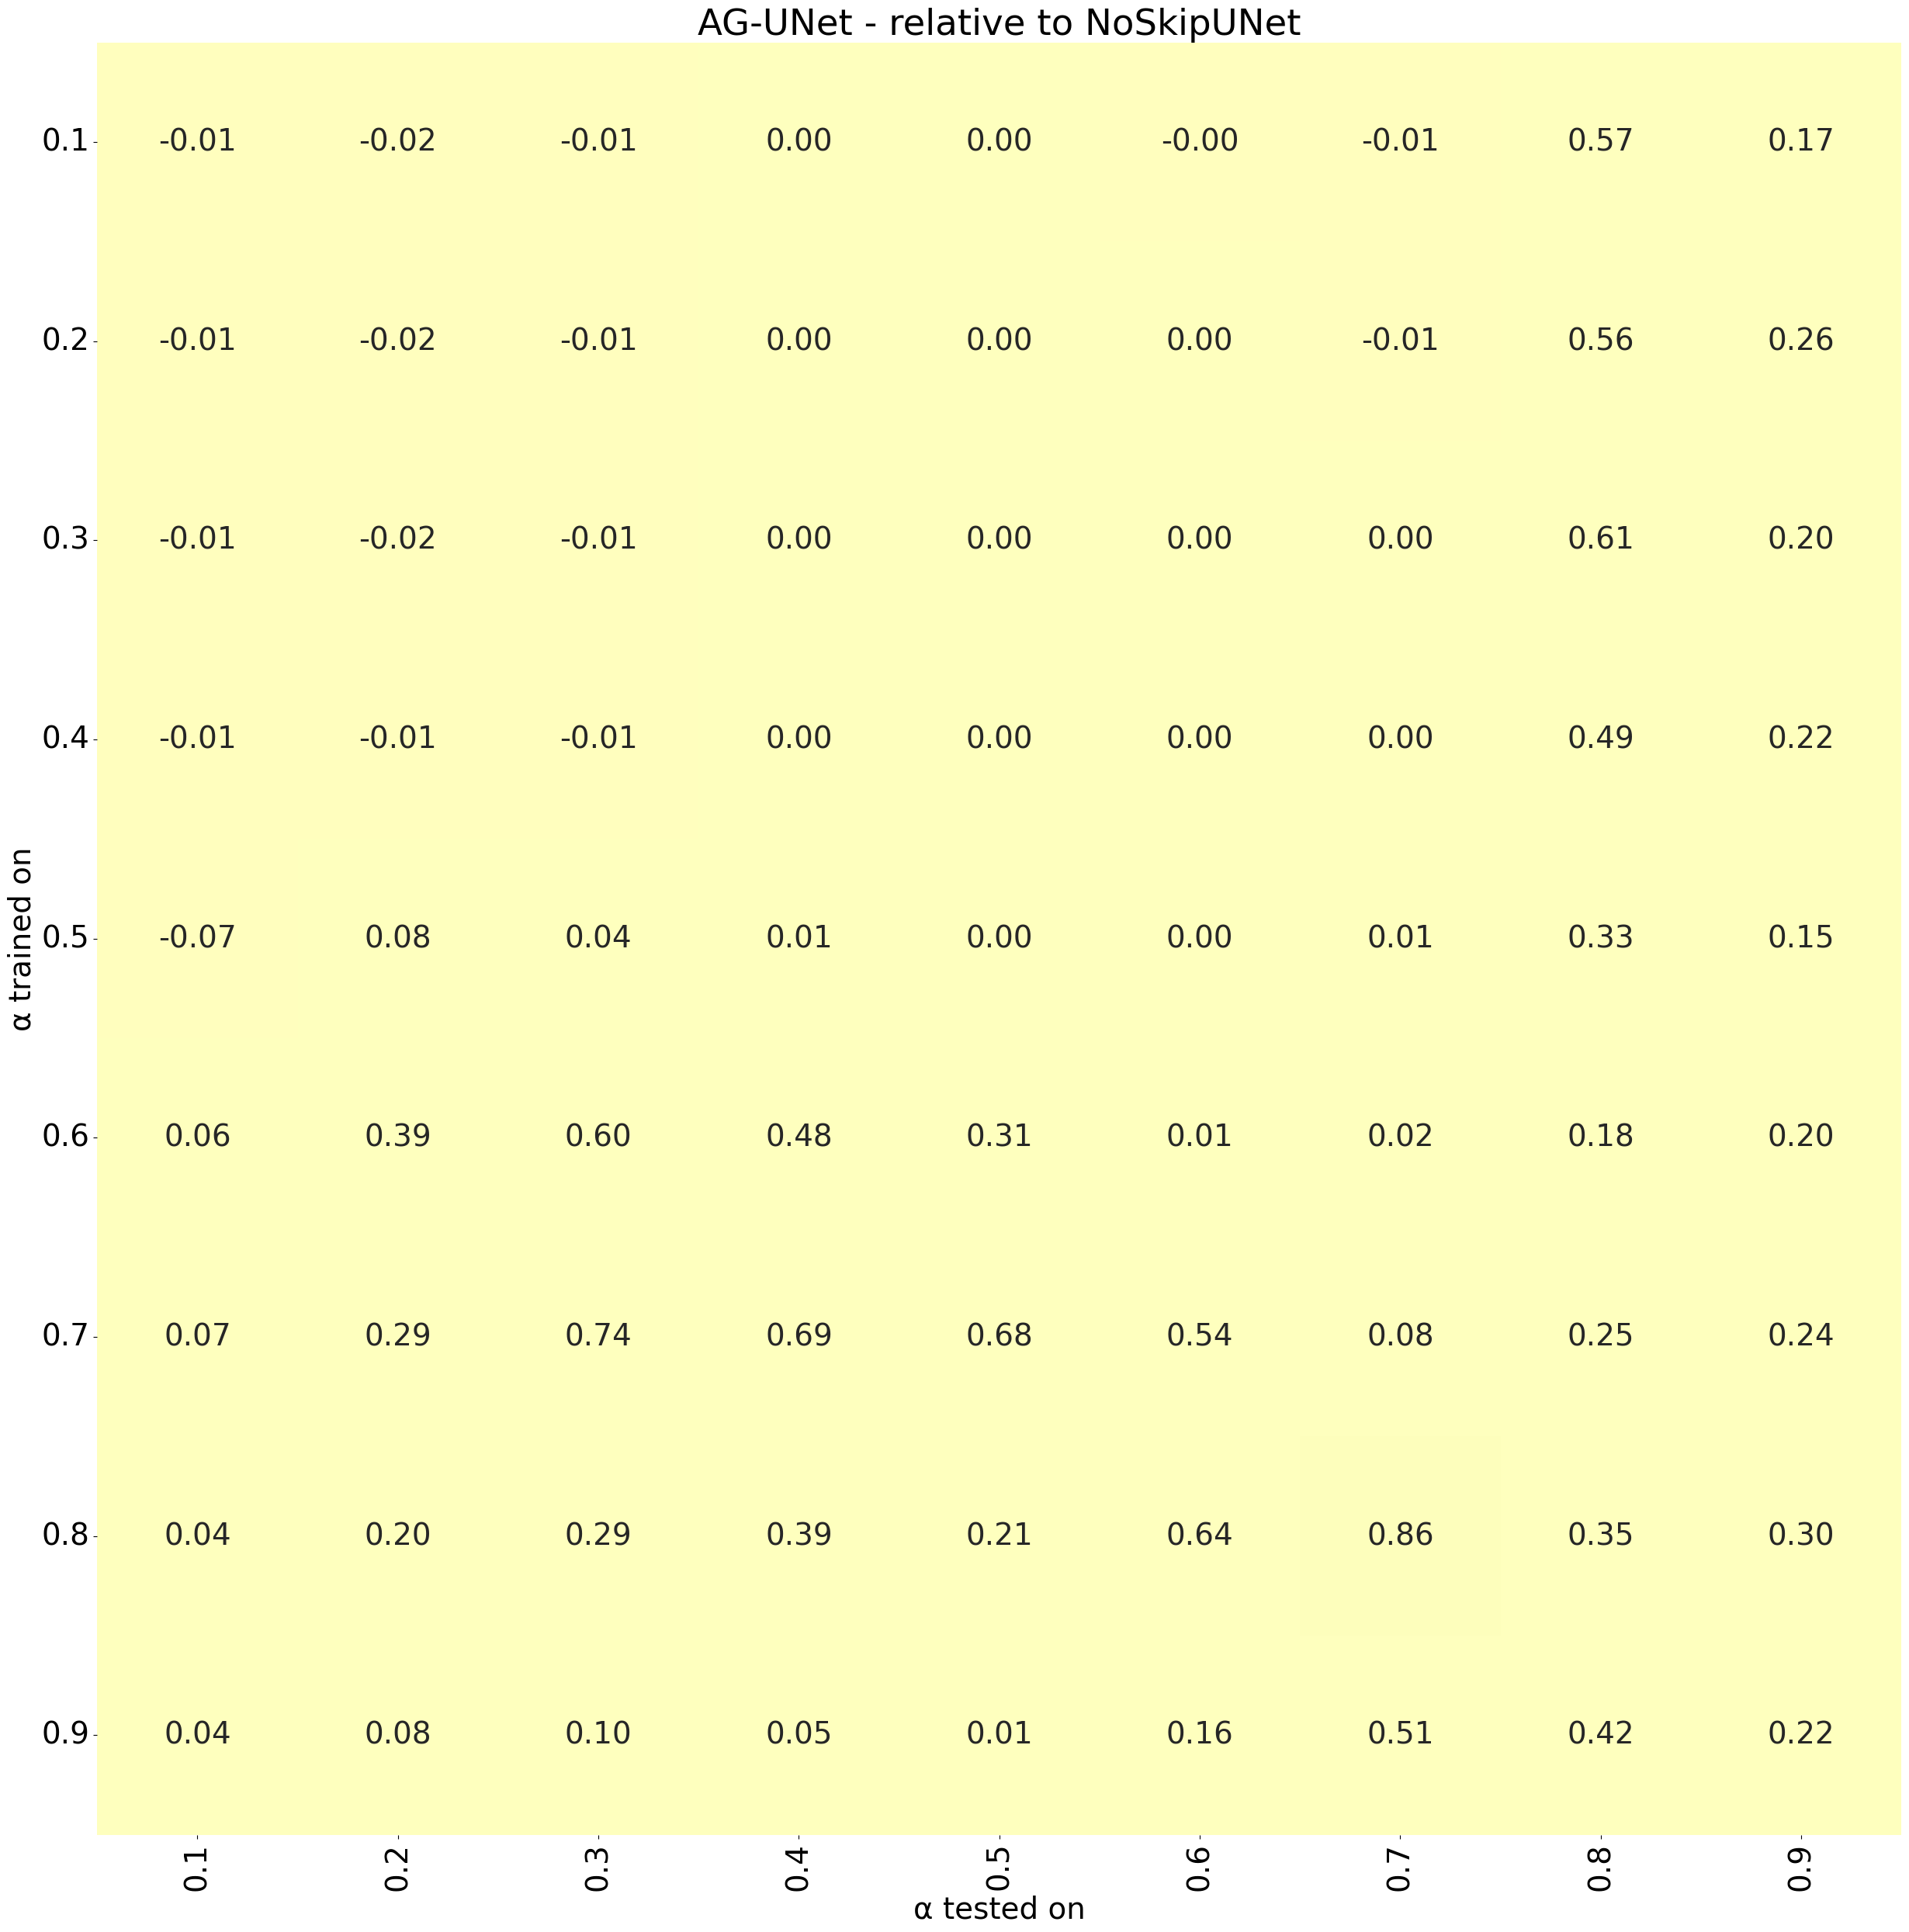

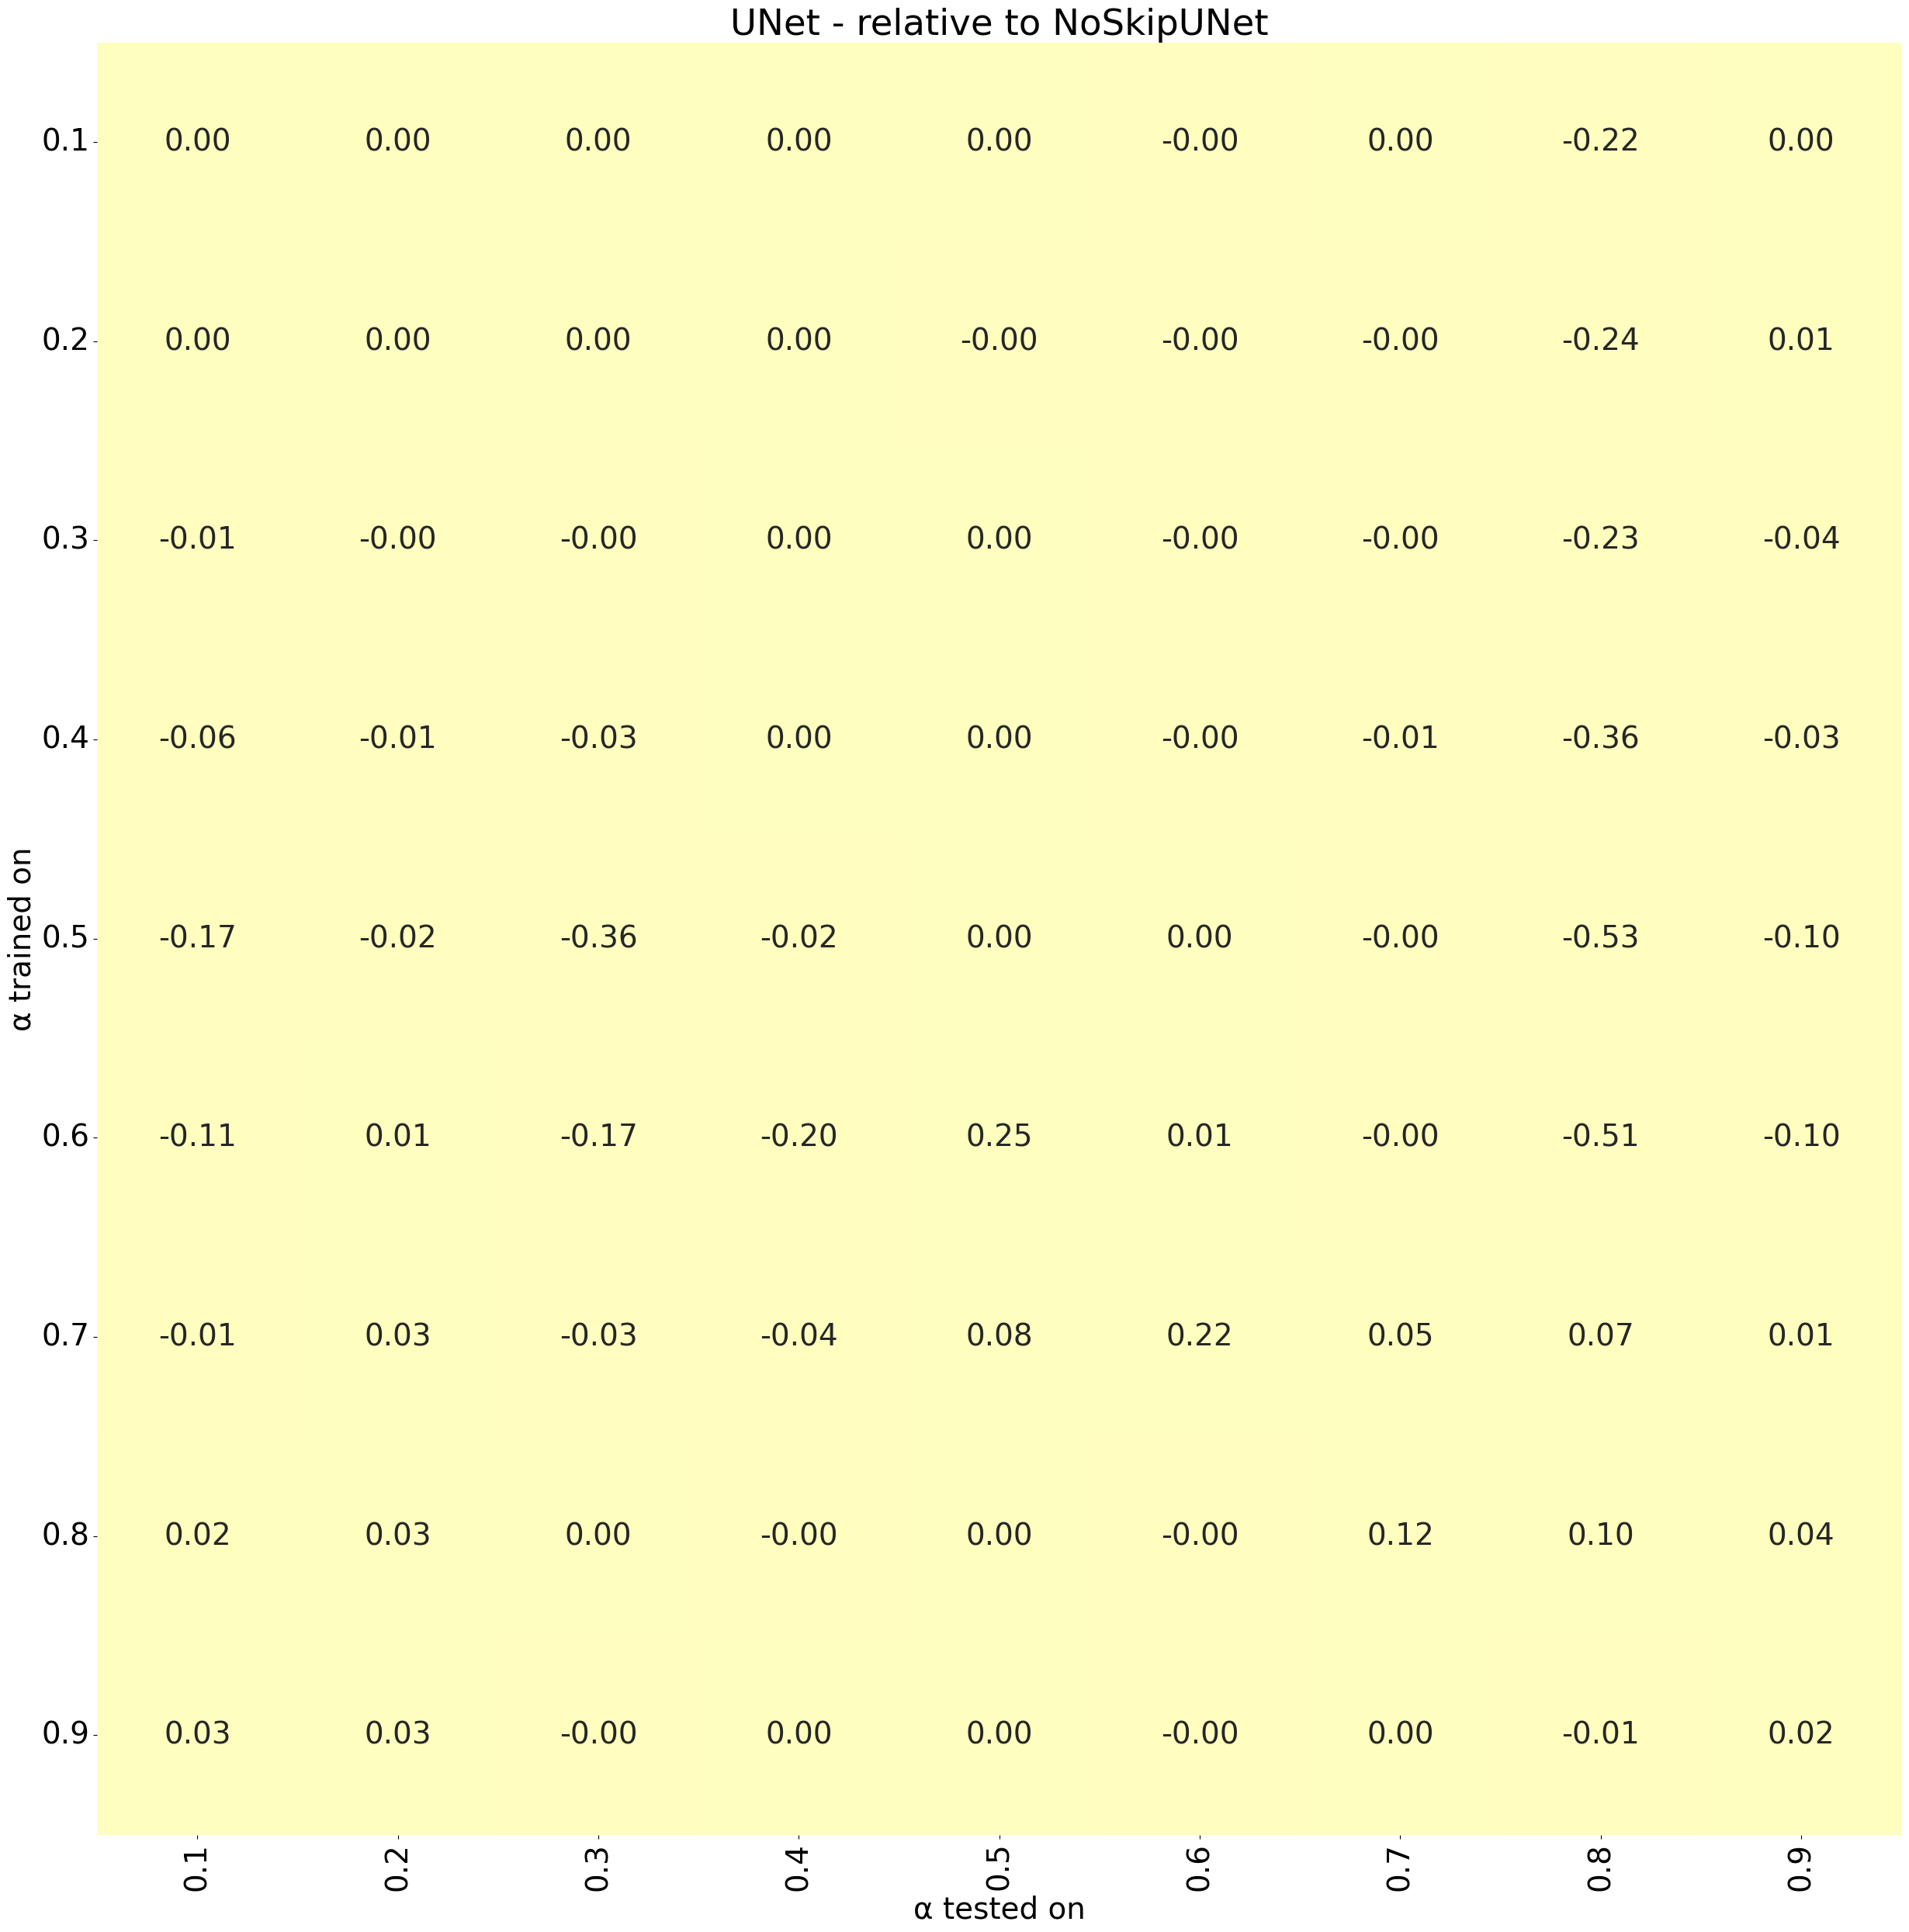

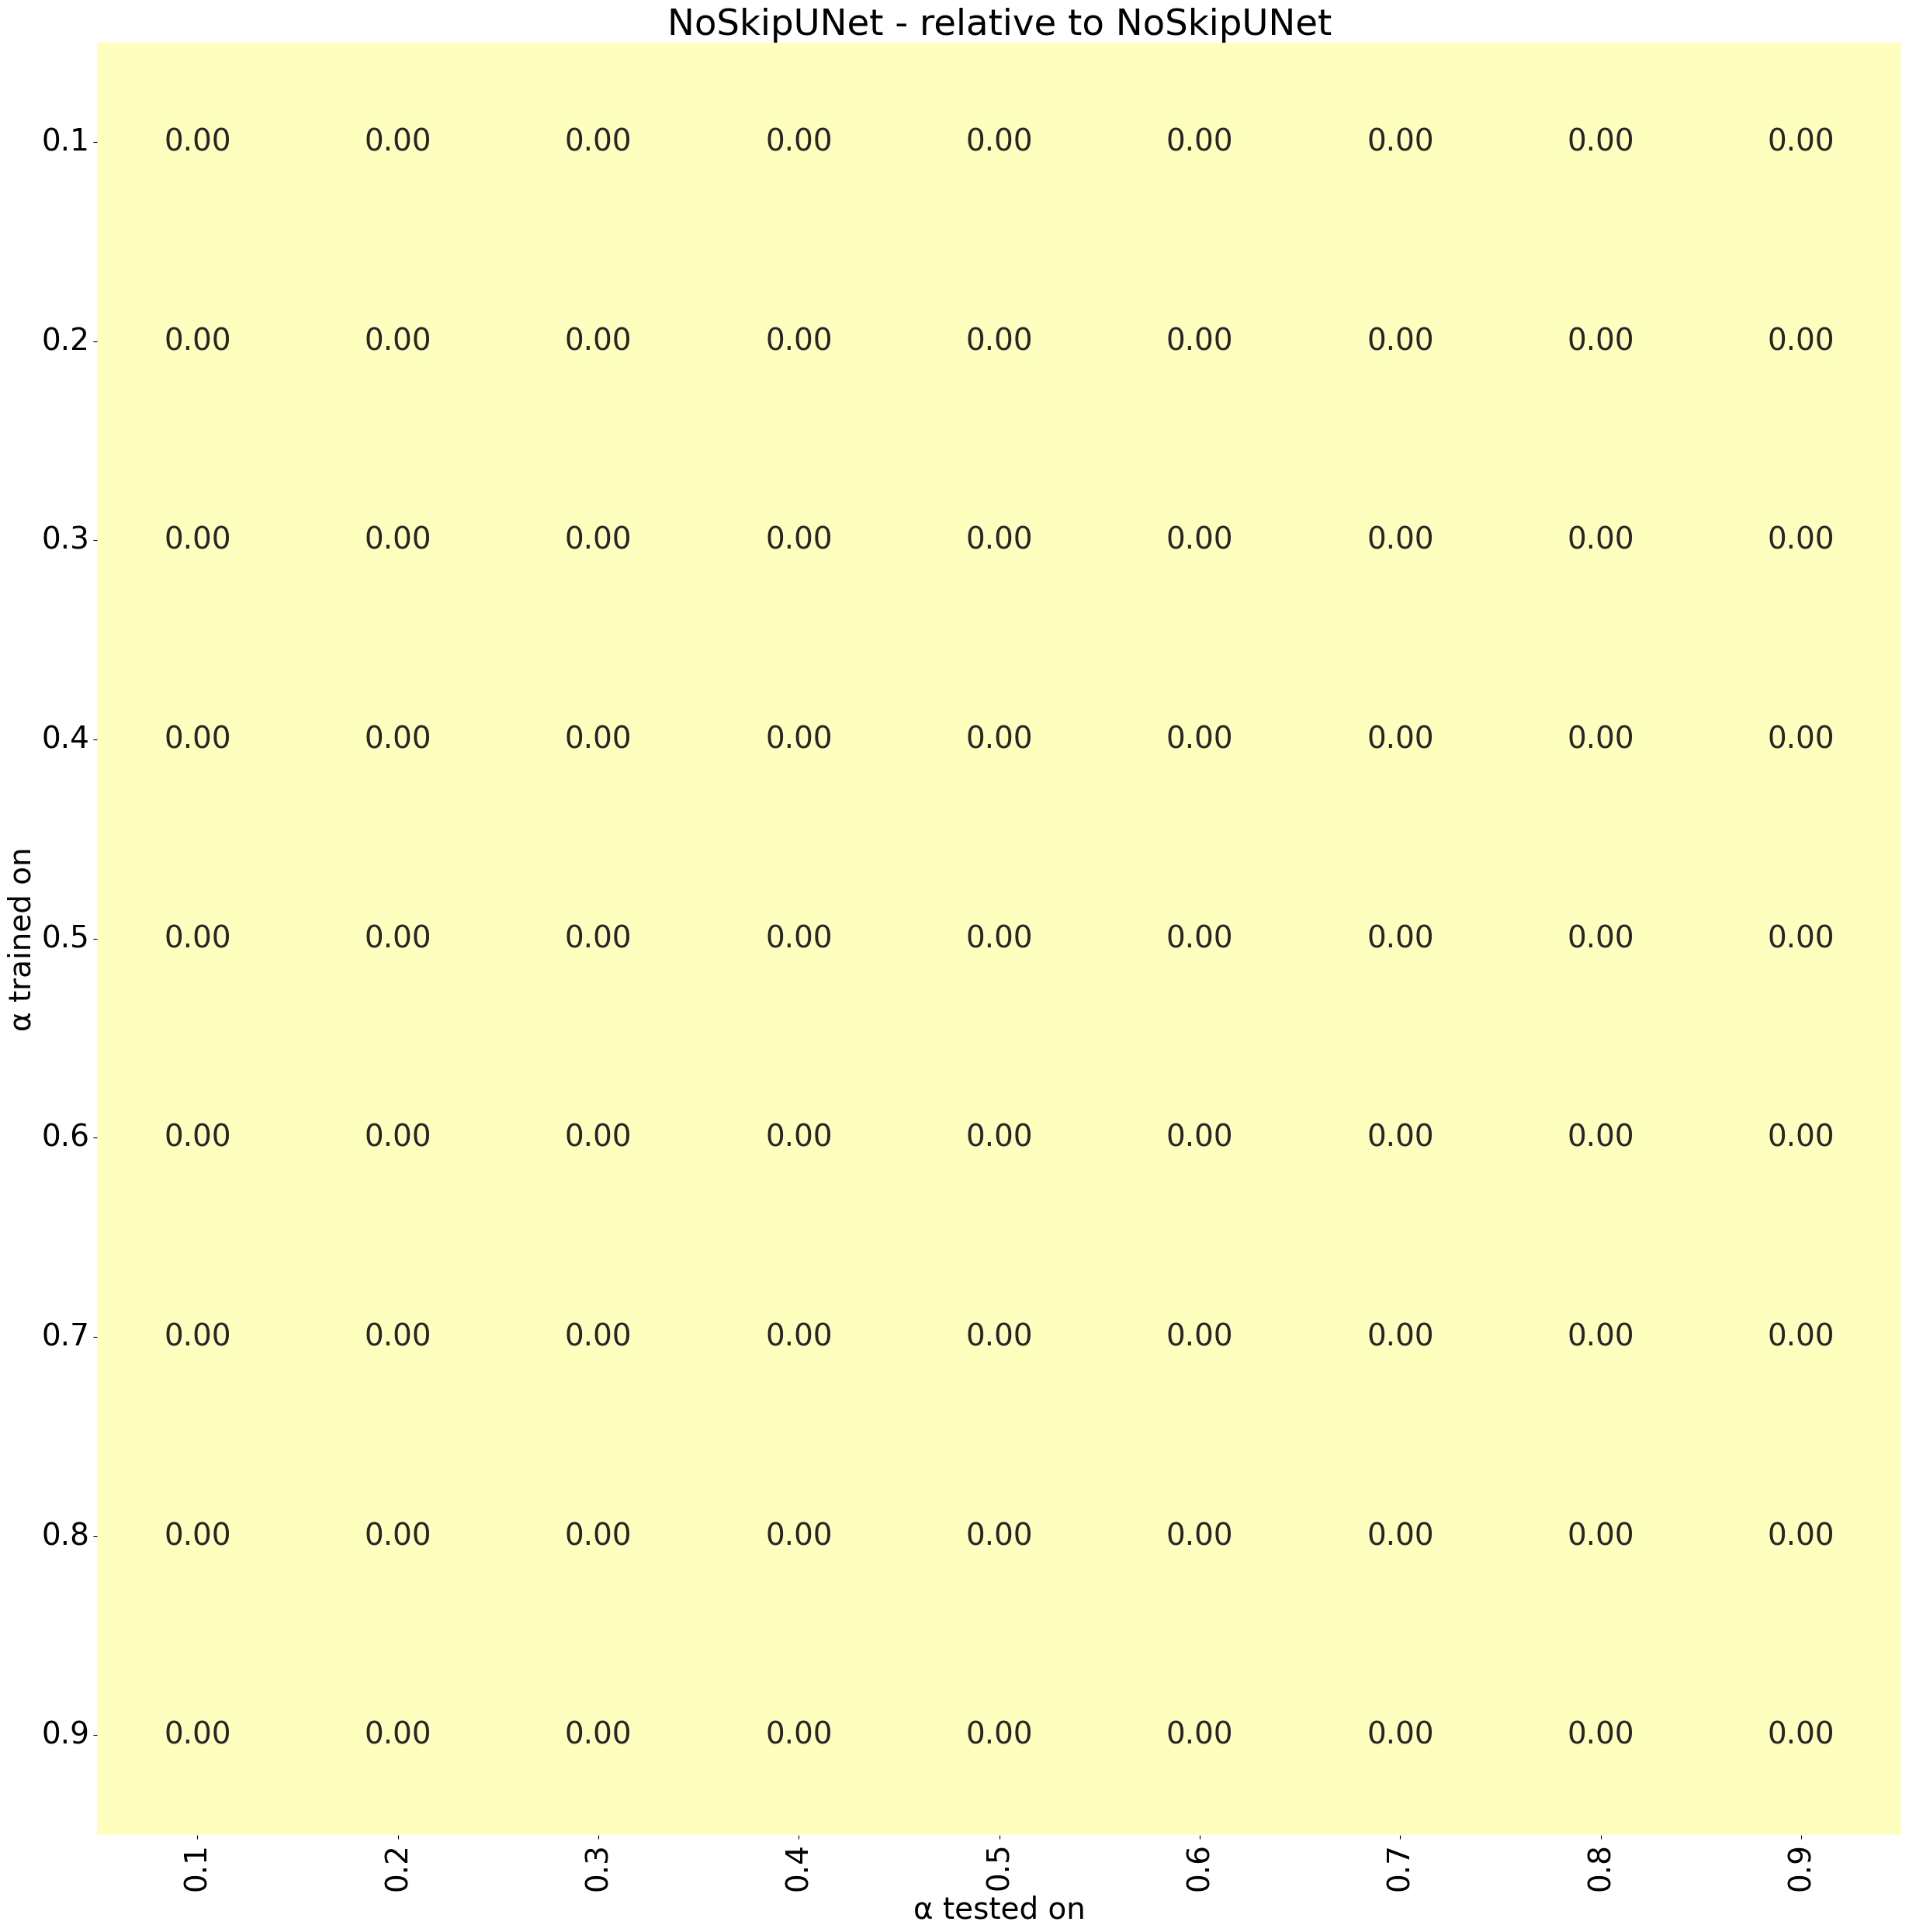

In [10]:
baseline_data = noskipunet_data

for net_name in df_list.keys():
    relative_df = (df_list[net_name] - baseline_data)
    relative_df.divide(baseline_data, fill_value=0.0)
    plot_robustness(relative_df, max_val=100.0, min_val=-100.0)
    plt.title(net_name + " - relative to NoSkipUNet")